In [1]:
%matplotlib inline

# seqFish Data Analysis

In [2]:
# Package imports and data loading
import numpy as np
import scanpy as sc
import squidpy as sq
import pandas as pd

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# loading squid py data
adata = sq.datasets.seqfish()

/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.6 umap==0.5.5 numpy==1.23.4 scipy==1.12.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11
squidpy==1.4.1


100%|██████████| 30.7M/30.7M [00:10<00:00, 3.02MB/s]
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


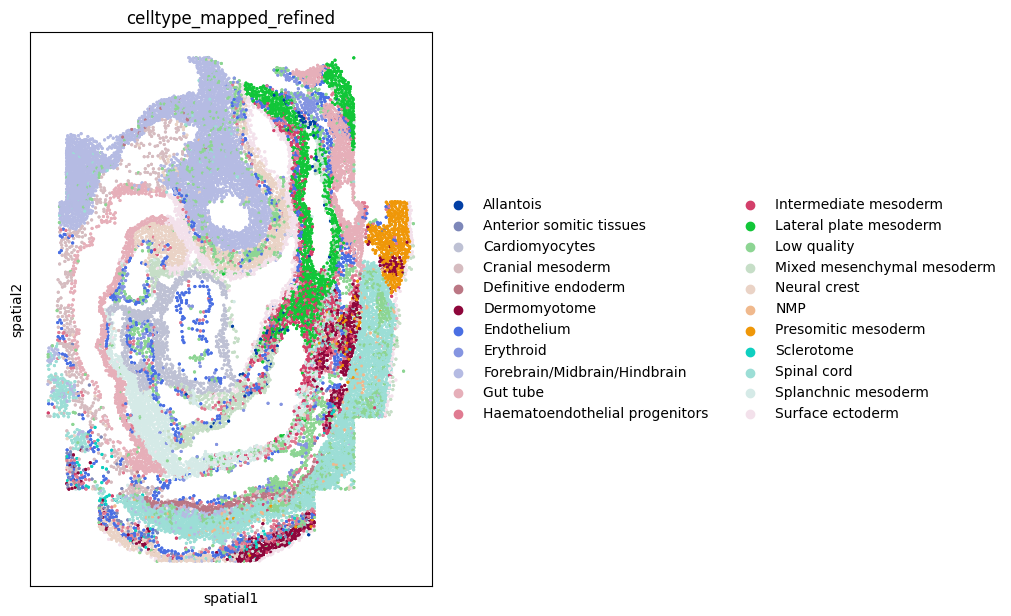

In [3]:
# Visualisation of the cluster annotation
sq.pl.spatial_scatter(adata, color="celltype_mapped_refined", shape = None, figsize=(10, 10))

## Neighbourhood Enrichment Analysis

The enrichment score is based on the frequency with which two clusters are close together, a higher score indicates that the clusters are regulary close together in the sample.

100%|██████████| 1000/1000 [00:01<00:00, 768.09/s]
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/pl/_utils.py:557: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]


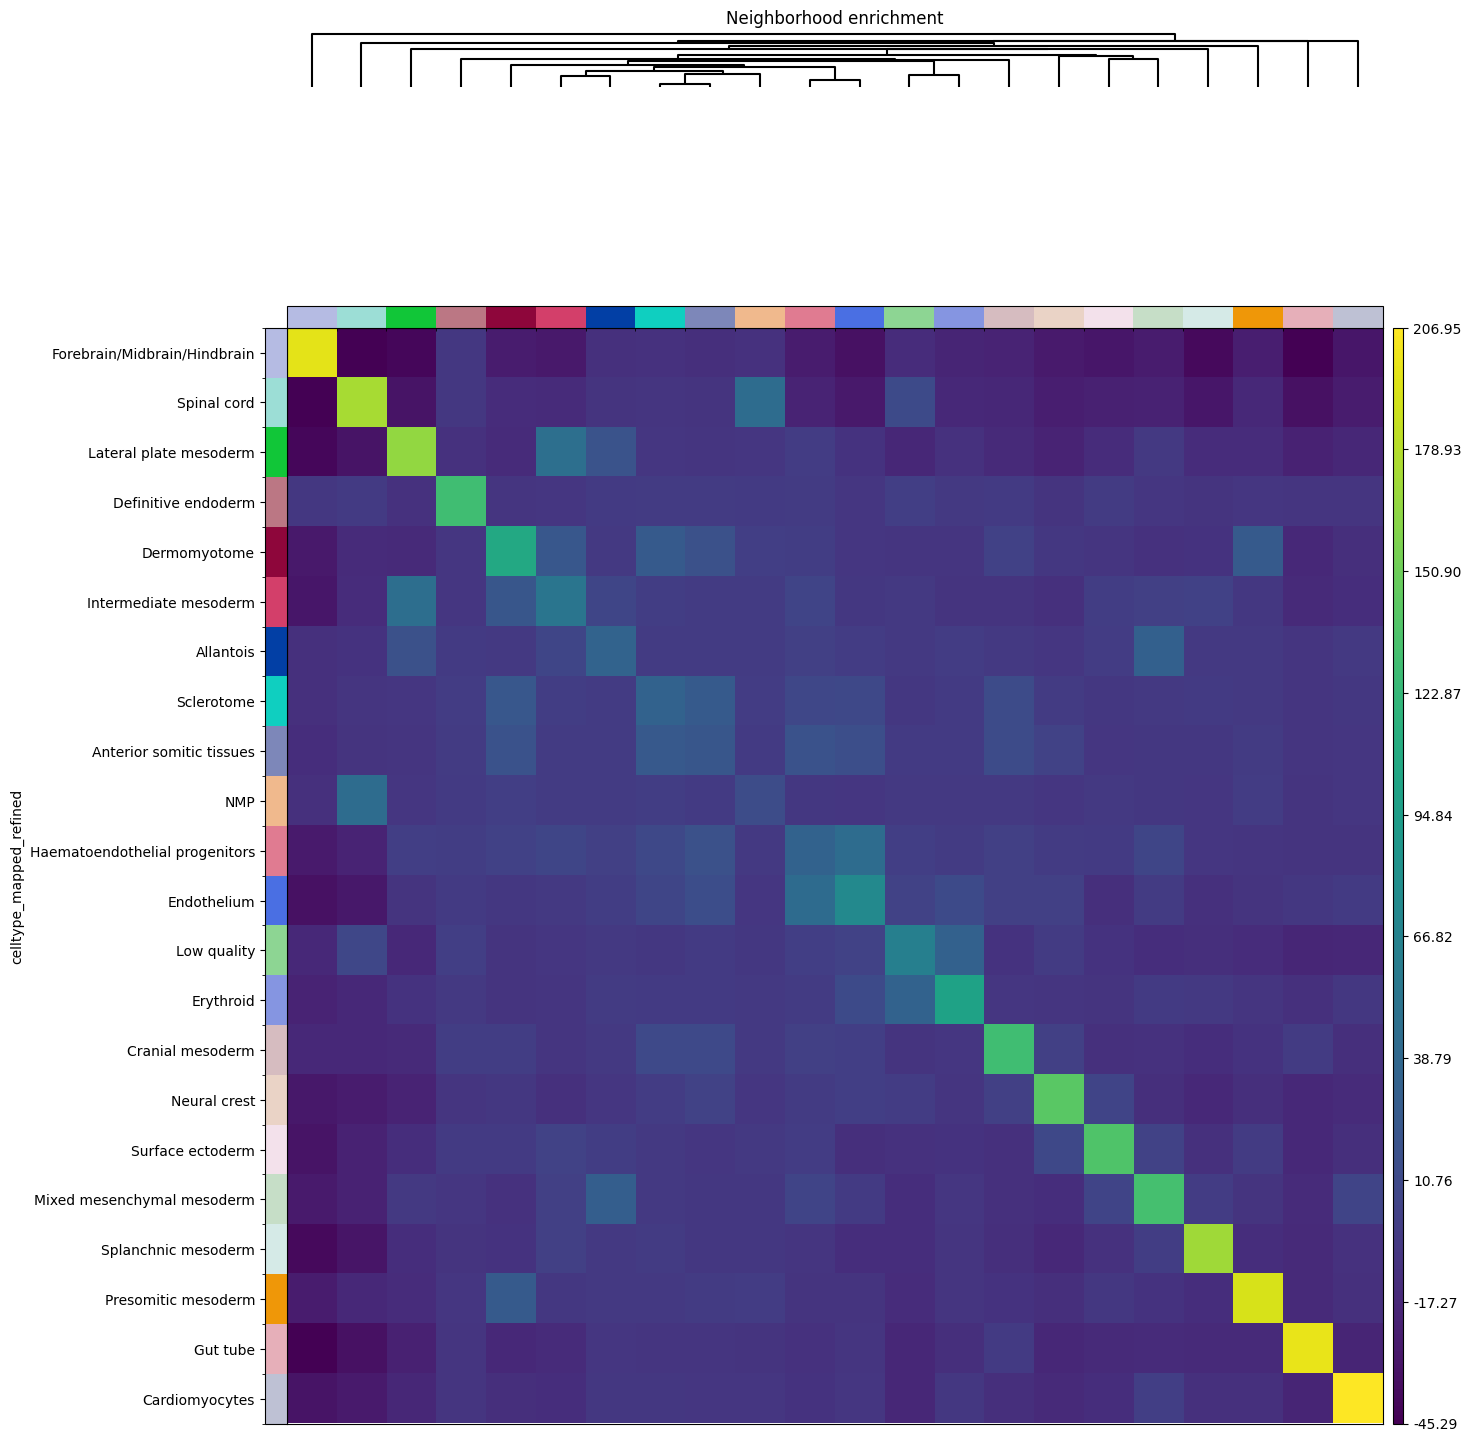

In [4]:
sq.gr.spatial_neighbors(adata,coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined")
sq.pl.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", method="ward")
            

/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


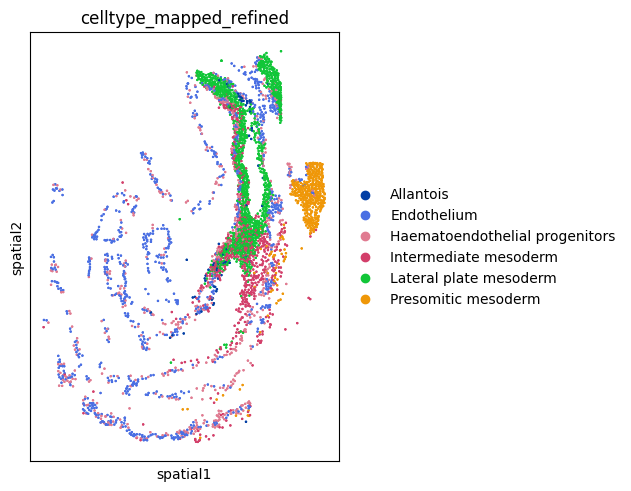

In [5]:
sq.pl.spatial_scatter(
    adata,
    color="celltype_mapped_refined",
    groups=["Endothelium",
            "Haematoendothelial progenitors",
            "Allantois",
            "Lateral plate mesoderm",
            "Intermediate mesoderm",
            "Presomitic mesoderm",],
    shape = None,
    size = 2
)

## Co-occurrence across spatial dimensions

100%|██████████| 1/1 [00:39<00:00, 39.25s/]


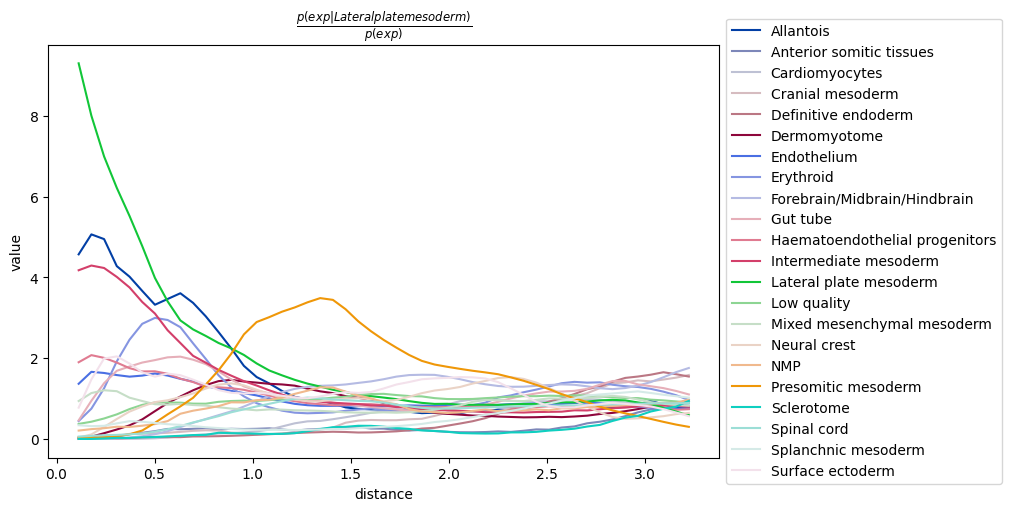

In [6]:
sq.gr.co_occurrence(adata, cluster_key="celltype_mapped_refined")
sq.pl.co_occurrence(adata, cluster_key="celltype_mapped_refined",
                    clusters="Lateral plate mesoderm",
                    figsize=(10, 5))

- Plots co-occurrence between Lateral plate mesoderm and other clusters
- Allantois and Intermediate Mesoderm both demonstrate co-occurrence
- Same occurs at longe distances in th Presomitic cluster

## Ligand Receptor analysis

In [47]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="celltype_mapped_refined",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
    threshold=0
)

/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/gr/_ligrec.py:733: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data.groupby("clusters")
100%|██████████| 1000/1000 [00:01<00:00, 544.84permutation/s]


In [48]:
res["means"].head()

cluster_1     Allantois                                          \
cluster_2     Allantois Anterior somitic tissues Cardiomyocytes   
source target                                                     
DLL1   NOTCH1  0.168831                 1.131899       0.159236   
WNT5A  FZD2    1.707792                 1.962662       2.056794   
NOTCH1 FURIN   0.642857                 0.612825       1.470246   
DLL3   NOTCH1  0.175325                 1.138393        0.16573   
PDGFA  PDGFRA  1.162338                 1.566558       0.600892   

cluster_1                                                                    \
cluster_2     Cranial mesoderm Definitive endoderm Dermomyotome Endothelium   
source target                                                                 
DLL1   NOTCH1         0.673837            0.785592     0.988453    1.667768   
WNT5A  FZD2           3.127435            2.609963     2.286037    1.276802   
NOTCH1 FURIN          0.580222            0.904366     0.554183    1.458041   
DLL3   NOTCH1          0.68033            0.792086     0.994947    1.674262   
PDGFA  PDGFRA         1.230655            0.299037     1.154888    0.427617   

cluster_1                                                       ...  \
cluster_2     Erythroid Forebrain/Midbrain/Hindbrain  Gut tube  ...   
source target                                                   ...   
DLL1   NOTCH1  0.173268                     0.585858  0.199839  ...   
WNT5A  FZD2    1.004329                     1.983181  2.354397  ...   
NOTCH1 FURIN   0.390563                     0.353491  0.856287  ...   
DLL3   NOTCH1  0.179762                     0.592352  0.206333  ...   
PDGFA  PDGFRA  0.282511                     0.303252  0.381254  ...   

cluster_1           Surface ectoderm                                         \
cluster_2     Lateral plate mesoderm Low quality Mixed mesenchymal mesoderm   
source target                                                                 
DLL1   NOTCH1               0.322616    0.338301                   0.271979   
WNT5A  FZD2                  2.06208    0.686339                   1.897449   
NOTCH1 FURIN                0.858935    0.432705                   1.333961   
DLL3   NOTCH1               0.294526    0.310211                   0.243889   
PDGFA  PDGFRA               3.000226     1.70586                   2.650668   

cluster_1                                                            \
cluster_2           NMP Neural crest Presomitic mesoderm Sclerotome   
source target                                                         
DLL1   NOTCH1  1.639986     0.631671            2.587594   1.284716   
WNT5A  FZD2    1.632386     2.796322            1.379231   1.542231   
NOTCH1 FURIN     0.5472     0.699748            0.653626   0.692284   
DLL3   NOTCH1  1.611896     0.603581            2.559504   1.256626   
PDGFA  PDGFRA  1.779456      2.60867            2.391811     3.4897   

cluster_1                                                       
cluster_2     Spinal cord Splanchnic mesoderm Surface ectoderm  
source target                                                   
DLL1   NOTCH1    1.017692            0.276717         0.425718  
WNT5A  FZD2      1.374218            2.412009         2.203496  
NOTCH1 FURIN     0.506117            0.884062         0.941323  
DLL3   NOTCH1    0.989602            0.248628         0.397628  
PDGFA  PDGFRA     1.74956            2.677603         1.826467  

[5 rows x 484 columns]

In [49]:
res["pvalues"].head()


cluster_1     Allantois                                          \
cluster_2     Allantois Anterior somitic tissues Cardiomyocytes   
source target                                                     
DLL1   NOTCH1       1.0                    0.165            1.0   
WNT5A  FZD2       0.273                    0.012            0.0   
NOTCH1 FURIN        1.0                      1.0          0.001   
DLL3   NOTCH1       1.0                    0.003            1.0   
PDGFA  PDGFRA     0.003                      0.0          0.993   

cluster_1                                                                    \
cluster_2     Cranial mesoderm Definitive endoderm Dermomyotome Endothelium   
source target                                                                 
DLL1   NOTCH1            0.986               0.756        0.332       0.009   
WNT5A  FZD2                0.0                 0.0          0.0         1.0   
NOTCH1 FURIN               1.0               0.919          1.0         0.0   
DLL3   NOTCH1            0.792               0.326        0.009         0.0   
PDGFA  PDGFRA              0.0                 1.0        0.001         1.0   

cluster_1                                                      ...  \
cluster_2     Erythroid Forebrain/Midbrain/Hindbrain Gut tube  ...   
source target                                                  ...   
DLL1   NOTCH1       1.0                          1.0      1.0  ...   
WNT5A  FZD2         1.0                          0.0      0.0  ...   
NOTCH1 FURIN        1.0                          1.0    0.987  ...   
DLL3   NOTCH1       1.0                        0.996      1.0  ...   
PDGFA  PDGFRA       1.0                          1.0      1.0  ...   

cluster_1           Surface ectoderm                                         \
cluster_2     Lateral plate mesoderm Low quality Mixed mesenchymal mesoderm   
source target                                                                 
DLL1   NOTCH1                    1.0         1.0                        1.0   
WNT5A  FZD2                      0.0         1.0                        0.0   
NOTCH1 FURIN                     1.0         1.0                        0.0   
DLL3   NOTCH1                    1.0         1.0                        1.0   
PDGFA  PDGFRA                    0.0         0.0                        0.0   

cluster_1                                                                     \
cluster_2        NMP Neural crest Presomitic mesoderm Sclerotome Spinal cord   
source target                                                                  
DLL1   NOTCH1    0.0          1.0                 0.0      0.003       0.074   
WNT5A  FZD2    0.409          0.0                 1.0      0.609         1.0   
NOTCH1 FURIN     1.0          1.0                 1.0        1.0         1.0   
DLL3   NOTCH1    0.0          1.0                 0.0        0.0         0.0   
PDGFA  PDGFRA    0.0          0.0                 0.0        0.0         0.0   

cluster_1                                           
cluster_2     Splanchnic mesoderm Surface ectoderm  
source target                                       
DLL1   NOTCH1                 1.0              1.0  
WNT5A  FZD2                   0.0              0.0  
NOTCH1 FURIN                  1.0            0.999  
DLL3   NOTCH1                 1.0              1.0  
PDGFA  PDGFRA                 0.0              0.0  

[5 rows x 484 columns]

In [50]:
res["metadata"].head()

,,aspect_intercell_source,aspect_intercell_target,category_intercell_source,category_intercell_target,category_source_intercell_source,category_source_intercell_target,consensus_direction,consensus_inhibition,consensus_score_intercell_source,consensus_score_intercell_target,...,scope_intercell_source,scope_intercell_target,secreted_intercell_source,secreted_intercell_target,sources,transmitter_intercell_source,transmitter_intercell_target,type,uniprot_intercell_source,uniprot_intercell_target
source,target,,,,,,,,,,,,,,,,,,,,,
DLL1,NOTCH1,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,11,21,...,generic,generic,False,False,Baccin2019;CellCall;CellChatDB;CellPhoneDB;Cel...,True,False,post_translational,O00548,P46531
WNT5A,FZD2,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,21,19,...,generic,generic,True,False,Baccin2019;CellCall;CellChatDB;CellPhoneDB_Cel...,True,False,post_translational,P41221,Q14332
NOTCH1,FURIN,functional,functional,ligand,receptor,resource_specific,resource_specific,False,False,1,2,...,generic,generic,False,True,HPRD;Wang,True,False,post_translational,P46531,P09958
DLL3,NOTCH1,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,7,21,...,generic,generic,False,False,CellCall;CellChatDB;CellPhoneDB;CellPhoneDB_Ce...,True,False,post_translational,Q9NYJ7,P46531
PDGFA,PDGFRA,functional,functional,ligand,receptor,resource_specific,resource_specific,True,False,18,22,...,generic,generic,True,False,Baccin2019;CellCall;CellChatDB;CellPhoneDB;Cel...,True,False,post_translational,P04085,P16234


/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/squidpy/pl/_ligrec.py:306: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for cls, size in (pvals.groupby(level=0, axis=1)).size().to_dict().items():
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/duncanbrady/honours24/codebase/ST_Honours_2024/.venv/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


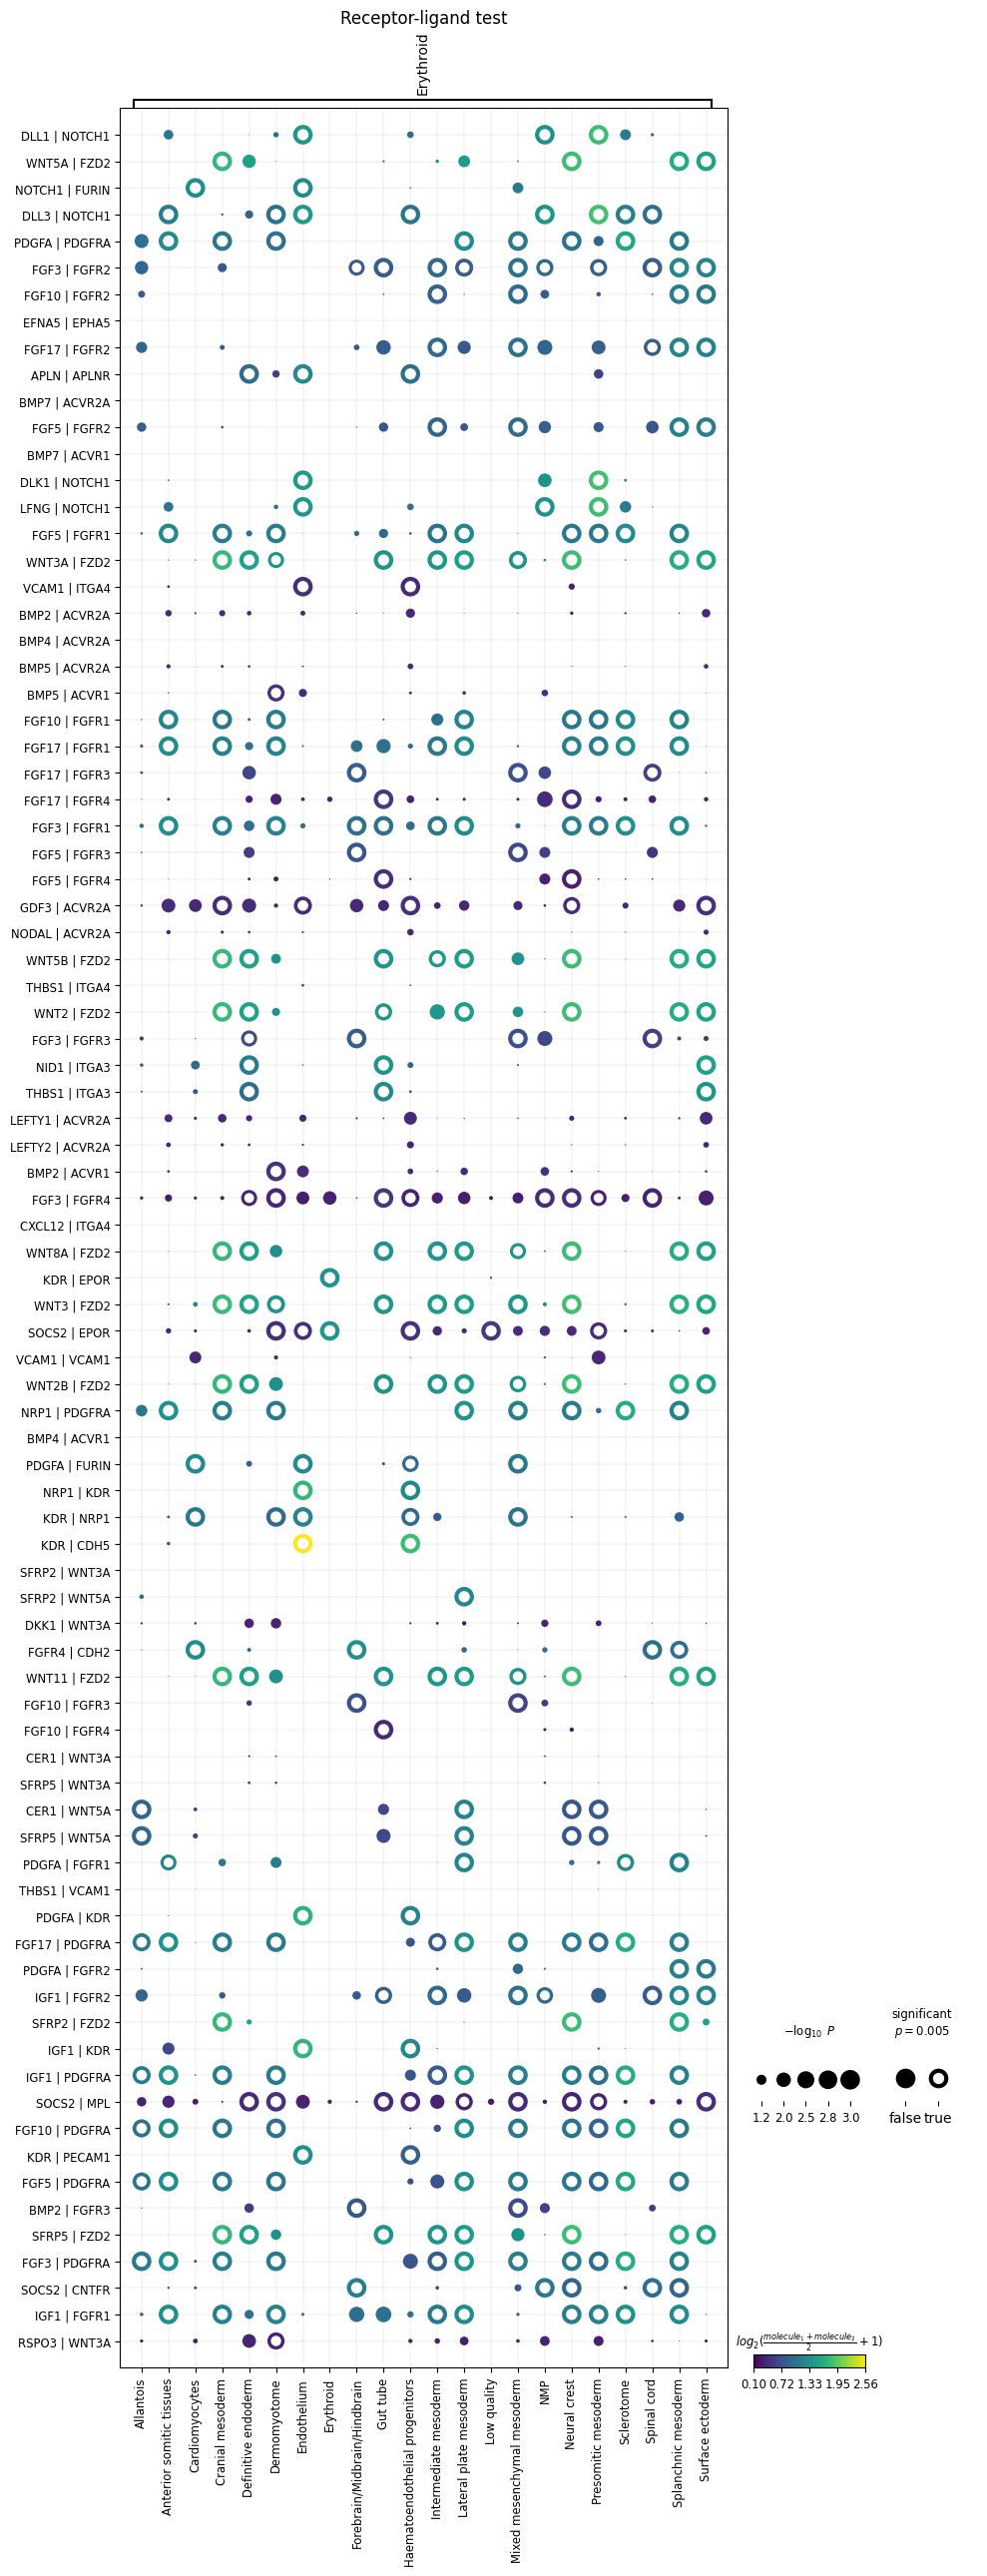

In [51]:
sq.pl.ligrec(res, source_groups="Erythroid", alpha=0.005)